**Sorted list** is a list where the values are in increasing order. It could also be sorted in decreasing order but usually, when we say sorted, we mean sorted in increasing order.

Sorting is perhaps the most ubiquitous problem in the field of algorithms. There are three main reasons for this:

1. The problem is easy to understand and not abstract.
2. The problem is complicated enough to have several interesting solutions.
3. Sorting is used very often in programs and algorithms in some way or another.

[`sorted()` built-in function](https://docs.python.org/3/howto/sorting.html) takes a list as input, and outputs a sorted version of that list, leaving the original list unchanged:

In [1]:
values = [4, 1, 5, 3, 2]
sorted_values = sorted(values)
print(values)
print(sorted_values)

[4, 1, 5, 3, 2]
[1, 2, 3, 4, 5]


We can also sort a list using the [`list.sort()` method](https://docs.python.org/3/library/stdtypes.html?highlight=list%20sort#list.sort). Contrary to the `sorted()` function, using the `list.sort()` method will modify the list instead of returning a new sorted list:

In [2]:
values = [4, 1, 5, 3, 2]
values.sort()
print(values)

[1, 2, 3, 4, 5]


Both of these provide the `reverse` keyword argument which, if set to `True`, will sort in decreasing order. For example:

In [3]:
values = [4, 1, 5, 3, 2]
values.sort(reverse=True)
print(values)

[5, 4, 3, 2, 1]


In [4]:
values = [6, 8, 7, 4, 3, 5, 2, 1, 9]
sorted_values = sorted(values)
sorted_values_reverse = sorted(values, reverse=True)

In practice, when we want to sort, we will usually use one of the two ways we learned above. However, since sorting is such a fundamental task, it is good to know how sorting works behind the scenes.

There are numerous sorting algorithms; teaching them all would probably take quite a some time. In this file, we will look at an algorithm named **selection sort**. This algorithm is not the most efficient, but analyzing its complexity will teach us interesting techniques that we can later apply to other algorithms.

Most sorting algorithms are based on the idea of **swapping elements**. Given a list and two list indexes, `i` and `j`, swapping positions `i` and `j` consists of replacing the value at index `i` by the value at index `j` and vice-versa.

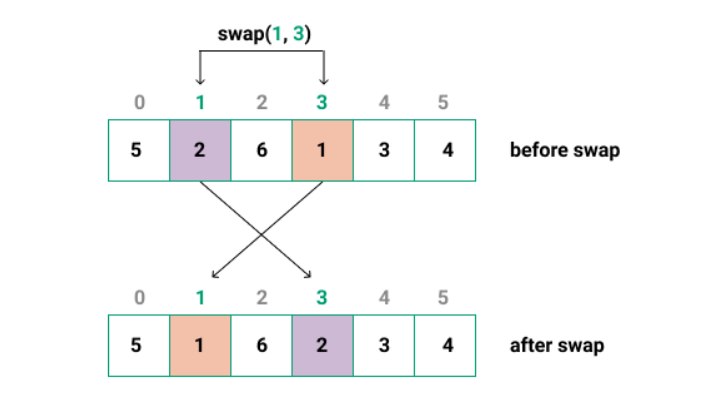

**Task**

* Implement the `swap()` function so that it exchanges the values of the list at the given indexes. More formally, after calling the function:
    * The value of `values[i]` should become `values[j]`.
    * The value of `values[j]` should become `values[i]`.
    
**Answer**

In [5]:
value_list = [1, 4, 5, 2, 3]

i = 1
j = 3

def swap(values, i, j):
    temp = values[i]
    values[i] = values[j]
    values[j] = temp

swap(value_list, i, j)
print(value_list)

[1, 2, 5, 4, 3]


One pitfall that might happen when we try to implement such a function is to translate literally from English and assign the value at index `i` to index `j` and then value at index `j` to index `i` like so:

`def bad_swap(values, i, j):
    values[i] = values[j]
    values[j] = values[i]`

The problem with this is that, after executing the first line, the original value of `values[i]` will be lost and replaced by the value of `values[j]`. Then, when the second line is executed, `values[j]` will remain the same. Therefore, in our solution, we store the initial value of `values[i]` in memory before erasing it.

We are now ready to go back to sorting. If we think about a sorted list, the first element will be the minimum value of the list. The second element will be the minimum of the remaining elements, and so on. Thus, one strategy to sort is to:

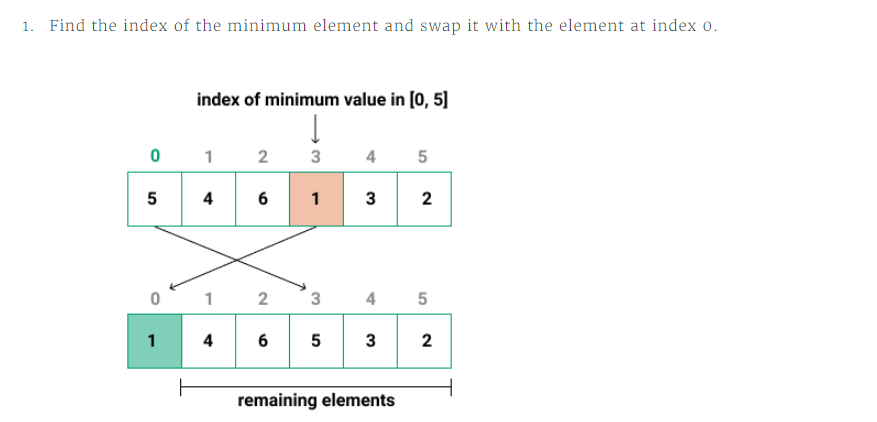

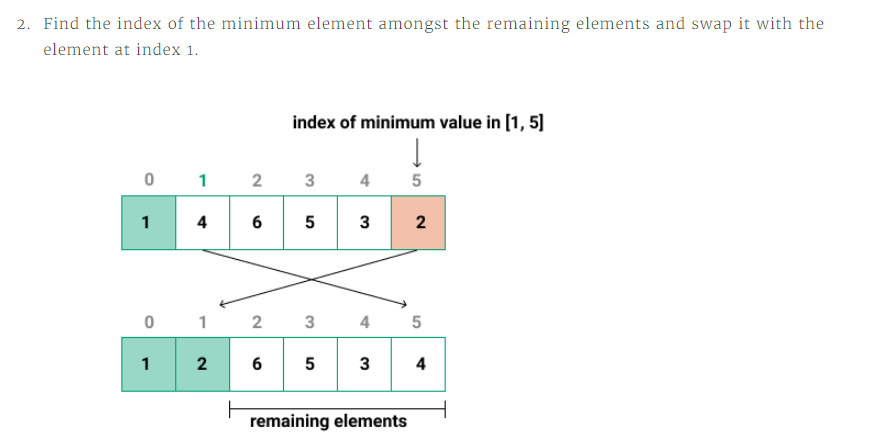

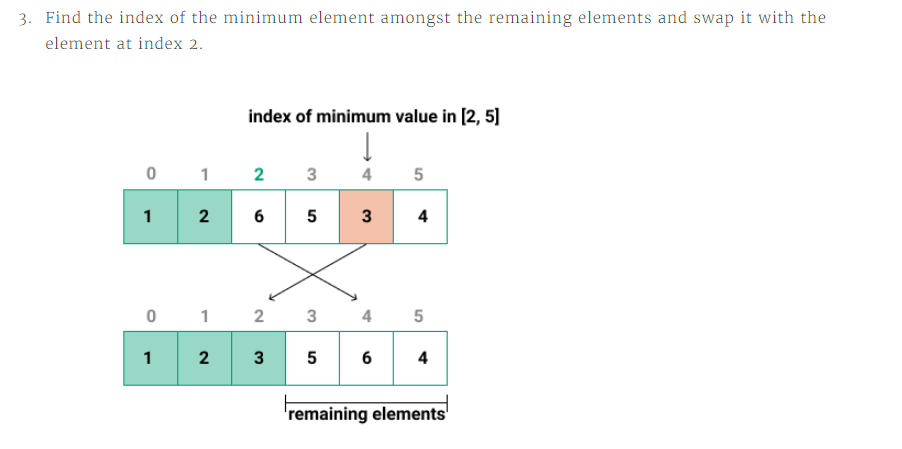

4. And so on...

As we can see, at each step, we are looking for the index of the minimum value. First, over indexes [0, 5], then [1, 5], then [2, 5], and so on. The only thing that changes at each iteration is the range start.

Let's start by writing a function that, given an array and a starting index, finds the index of the minimum value in that range.

In [6]:
def select_minimum_index_in_range(values, range_start):
    minimum = None
    minimum_index = None
    N = len(values)
    for i in range(range_start, N):
        if minimum == None or values[i] < minimum:
            minimum = values[i]
            minimum_index = i
    return minimum_index

**Task**

Let's replicate the first iteration of the above example by using above function. This will help us build some intuition on how we will use the `select_minimum_index_in_range()` function to implement our sorting algorithm.

**Answer**

In [7]:
values = [5, 4, 6, 1, 3, 2]

index = select_minimum_index_in_range(values, 0)
swap(values, 0, index)
print(values)

[1, 4, 6, 5, 3, 2]


As we can see, the minimum value is in the right position. To continue sorting, all we need to change is the starting index. If we select the minimum value starting at index `1` and swap the result with the current value at index `1`, we get:

In [8]:
# Step 2
index = select_minimum_index_in_range(values, 1)
swap(values, 1, index)
print(values)

[1, 2, 6, 5, 3, 4]


By repreating the same but using index `2` instead, we will have indexes `0`, `1`, and `2` sorted:

In [9]:
# Step 3
index = select_minimum_index_in_range(values, 2)
swap(values, 2, index)
print(values)

[1, 2, 3, 5, 6, 4]


After each step, we have one more element that is in the right place. Therefore, to sort the full list, we continue until we reach the last element. We can do this by using a `for` loop, like so

In [10]:
N = len(values)
for range_start in range(N):
    index = select_minimum_index_in_range(values, range_start)
    swap(values, range_start, index)

**Task**

A list named `values` is provided and our goal is to implement the `selection_sort()` algorithm using the `swap()` and `select_minimum_index_in_range()` functions. Then we will use this function to sort the provided list.

**Answer**

In [11]:
values = [5, 4, 6, 1, 3, 2]


def selection_sort(values):
    N = len(values)
    for range_start in range(N):
        index = select_minimum_index_in_range(values, range_start)
        swap(values, range_start, index)
        
selection_sort(values)
print(values)

[1, 2, 3, 4, 5, 6]


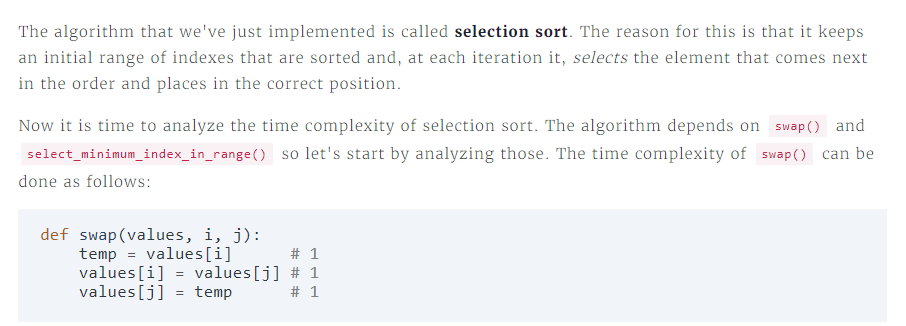

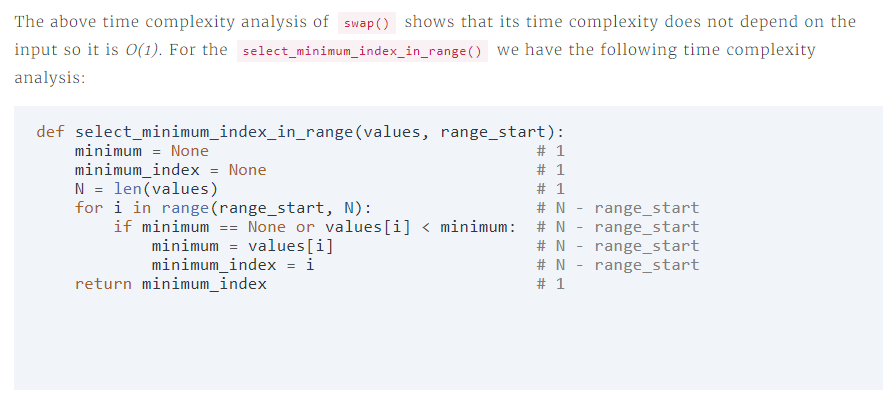

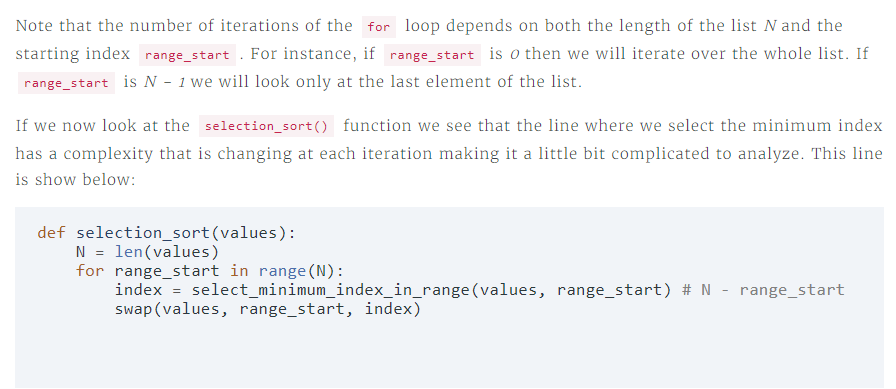

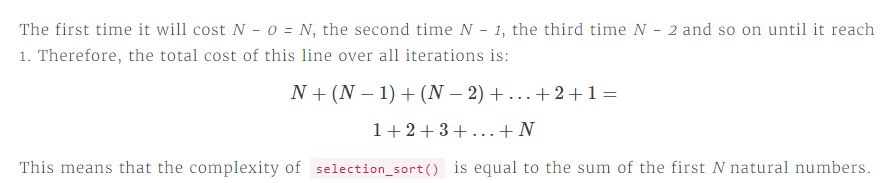

Let's write a program to plot this sum to see how this is growing.

**Task**

A function `plot_values()` to plot a list of values is provided. The goal of this exercise is to compute the above sum for all values of N ranging from 1 to 1,000 and plot them to see how it is growing.

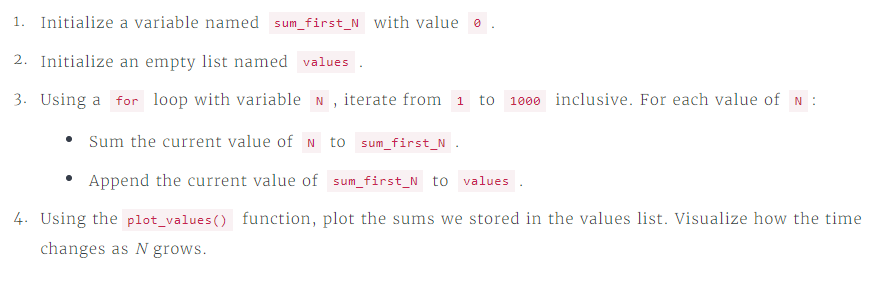

**Answer**

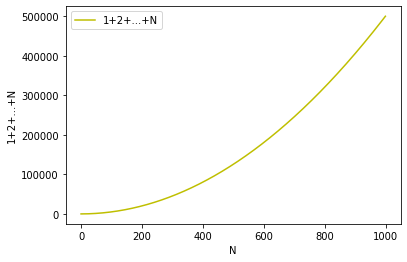

In [12]:
import matplotlib.pyplot as plt

def plot_values(values):
    plt.plot(values, label='1+2+...+N', color='y')
    plt.ylabel('1+2+...+N')
    plt.xlabel('N')
    plt.legend()
    plt.show()
    

sum_first_N = 0
values = []

for N in range(1, 1001): # make the range inclusive
    sum_first_N += N
    values.append(sum_first_N)
    
plot_values(values)

The plot above looks like it is growing faster than a linear function. 

To help visualize how fast it is growing, let's plot also the values of N and $N^2$:

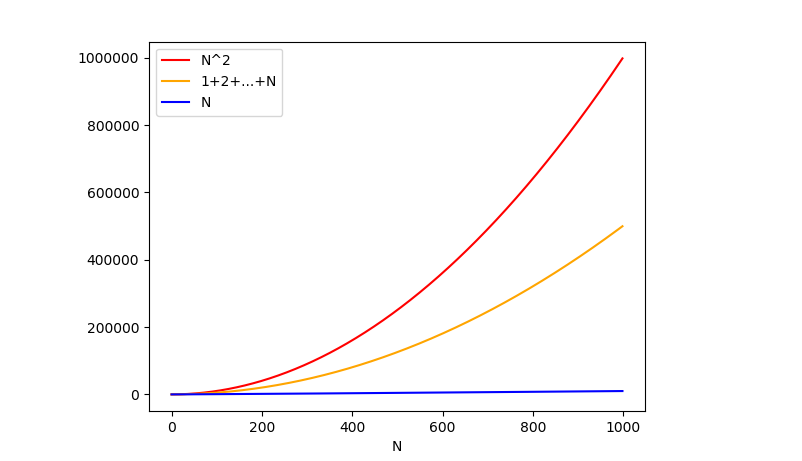

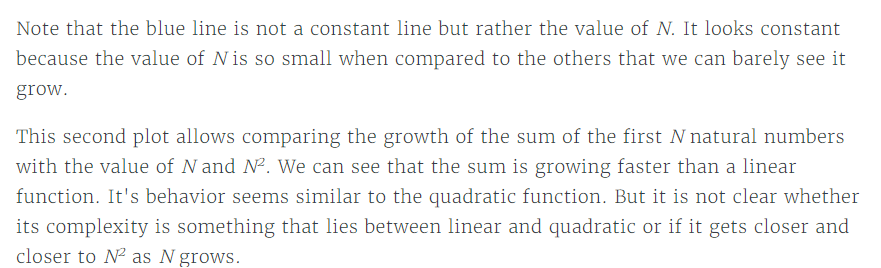

Now we are going to derive a formula for the sum of the first N natural numbers so that we can answer this question. This sum frequently occurs in programming, so it's good to be familiar with it.

There is a nice way to visualize this sum. Let's think of each number as a square with area 1, and stack them on top of each other like so:

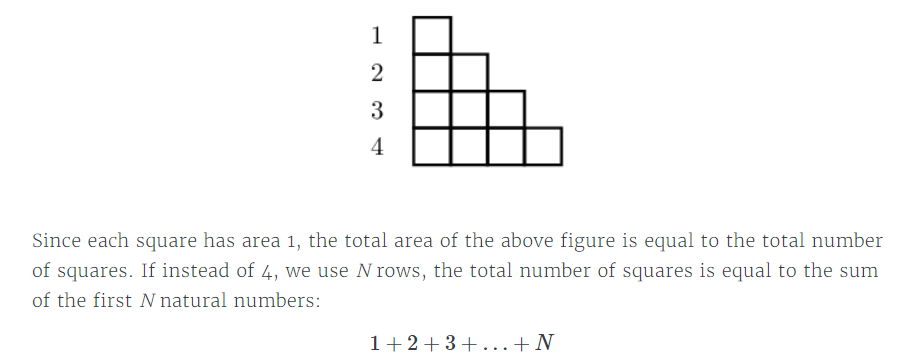

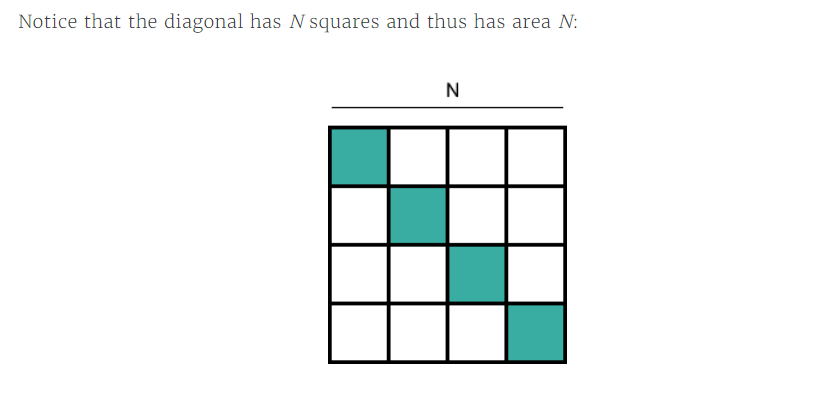

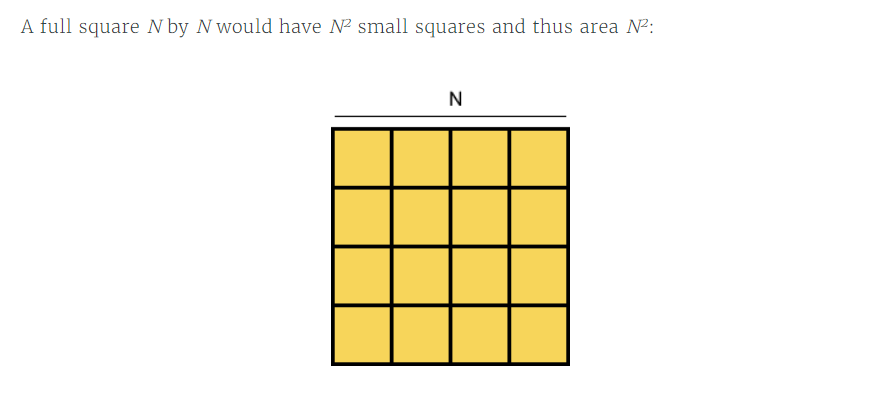

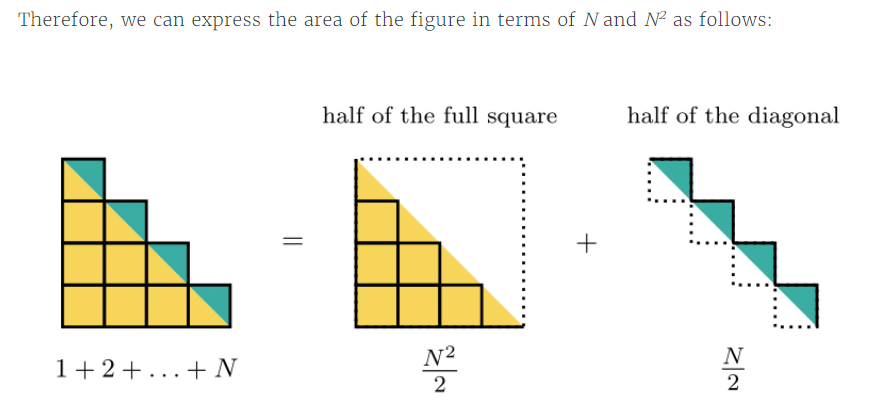

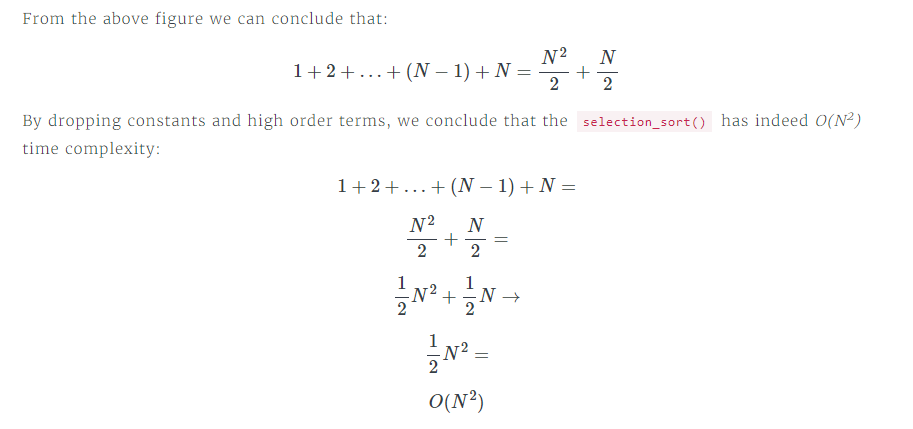

We can also confirm that this formula is correct by implementing it in Python and comparing its values with the values we calculated earlier.

**Task**

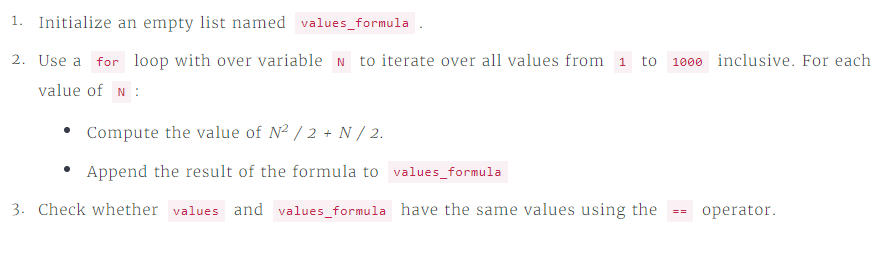

**Answer**

In [13]:
values_formula = []

for N in range(1, 1001): # Make the range inclusive
    sum_first_N = N*N/2 + N/2
    values_formula.append(sum_first_N)
    
print(values == values_formula)

True


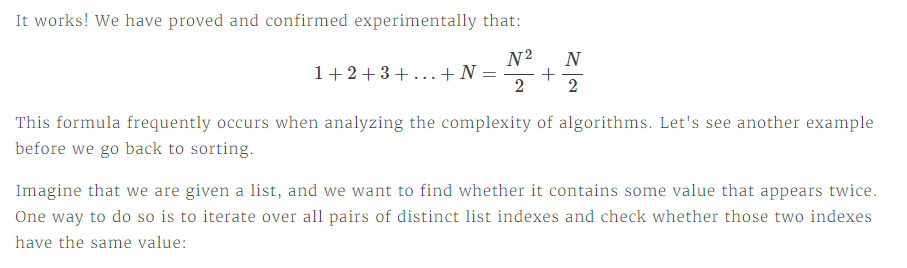

In [14]:
def find_pair(values):
    N = len(values)
    for i in range(N):
        for j in range(N):
            if i != j and values[i] == values[j]:
                return (i, j)
    return None

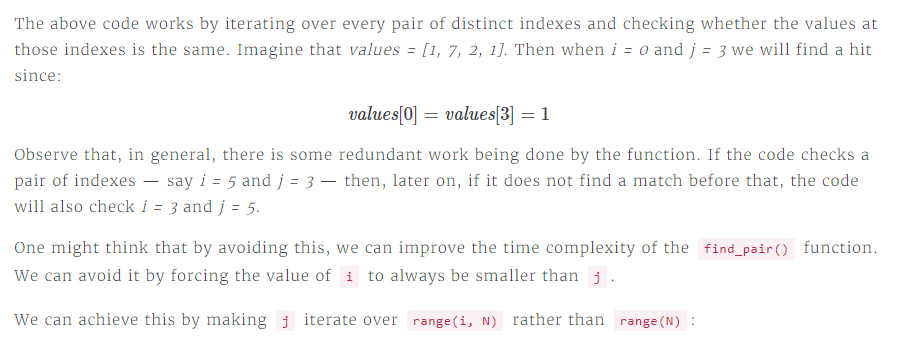

In [15]:
def find_pair(values):
    N = len(values)
    for i in range(N):
        for j in range(i, N):
            if i != j and values[i] == values[j]:
                return (i, j)
    return None

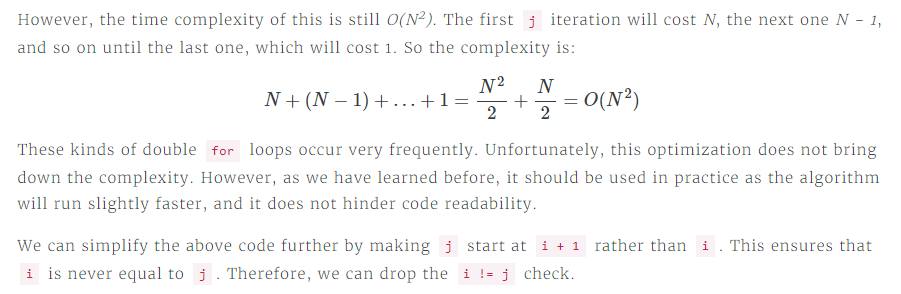

How many times do we think the `if` statement will be executed in the worst case if we start at `i + 1` rather than `j`?

**Task**

Another version of the `find_pair()` function is provided. This version implements the changes that we mentioned above.

Our goal is to use the formula that we have just learned to figure out exactly how many times the `if` statement will be executed in the worst case. The worst is when the values in the list are all distinct.

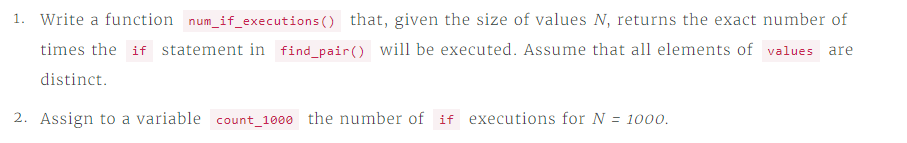

Our function will also be tested on a set of hidden inputs to ensure correctness.

**Answer**

In [16]:
def find_pair(values):
    N = len(values)
    count = 0
    for i in range(N):
        for j in range(i + 1, N):
            count += 1
            if values[i] == values[j]:
                return (i, j)
    print(count)
    return None


def num_if_executions(N):
    # We need to substract N elements
    # These corresponds to pairs with i = j
    return N*N/2 + N/2 - N

count_1000 = num_if_executions(1000)

We've now learned a formula to add together the first N natural numbers. We've seen a few examples where it is useful to analyze the time complexity of an algorithm. Let's get back to the sorting problem.

We implemented our own sorting algorithm and saw that it has quadratic complexity, $O(N^2)$. Now we are going to compare its execution time to the Python sorting algorithm.

We've learned how to generate random lists of values. We will make use of that here to build our experiment. Recall that random number can be generated using the [`random` module](https://docs.python.org/3.8/library/random.html).

We can generate a random list of length N with values between 1 and 10,000 like so:

In [18]:
import random

N = 10

rnd_values = [random.randint(1, 10000) for _ in range(N)]
print(rnd_values)

[3629, 7008, 282, 1544, 7159, 279, 941, 1354, 7805, 4689]


To compare our implementation of sort with the Python one, we will generate random arrays of sizes 1 to 500 and measure the execution time of both algorithms. We will then plot these times to visualize the results.

Recall that we can sort a list of values in Python by using the `sorted()` built-in function:

`values = [4, 5, 3, 1, 2]
sorted_values = sorted(values)`

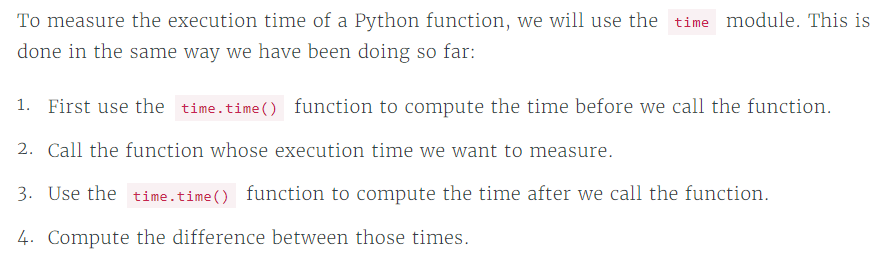

Here is an example applied to the `sorted()` function:

`import time
start = time.time()
sorted(values)
end = time.time()
runtime = end - start`

**Task**

The `selection_sort()` algorithm and `plot_times()` functionis are available.

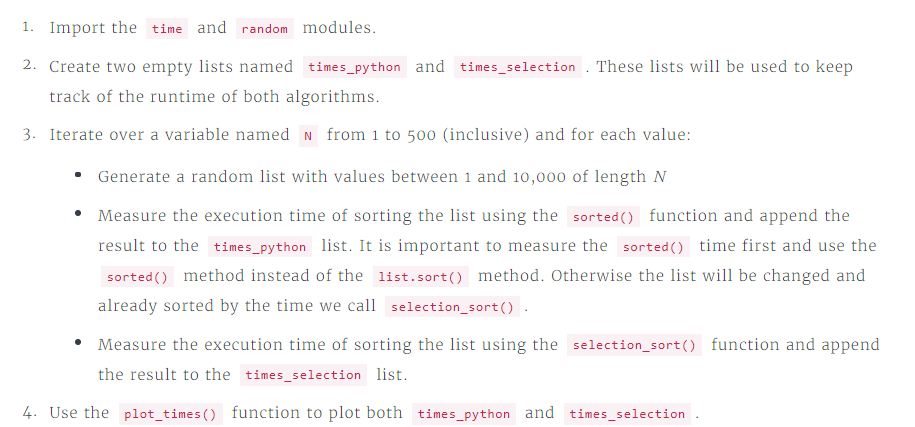

**Answer**

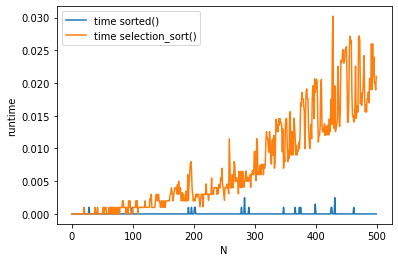

In [19]:
import matplotlib.pyplot as plt

def plot_times(times_python, times_selection):
    plt.plot(times_python, label='time sorted()')
    plt.plot(times_selection, label='time selection_sort()')
    plt.ylabel('runtime')
    plt.xlabel('N')
    plt.legend()
    plt.show()
    
def selection_sort(values):
    N = len(values)
    for range_start in range(N):
        index = select_minimum_index_in_range(values, range_start)
        swap(values, range_start, index)


import time
import random

times_python = []
times_selection = []

for N in range(1, 501):
    values = rnd_values = [random.randint(1, 10000) for _ in range(N)]
    # measure python sorted() time
    start = time.time()
    sorted(values)
    end = time.time()
    times_python.append(end - start)
    # measure selection_sort() time
    start = time.time()
    selection_sort(values)
    end = time.time()
    times_selection.append(end - start)
    
plot_times(times_python, times_selection)

As we saw in the above experiment, the sorting algorithm in Python is much more efficient than ours.

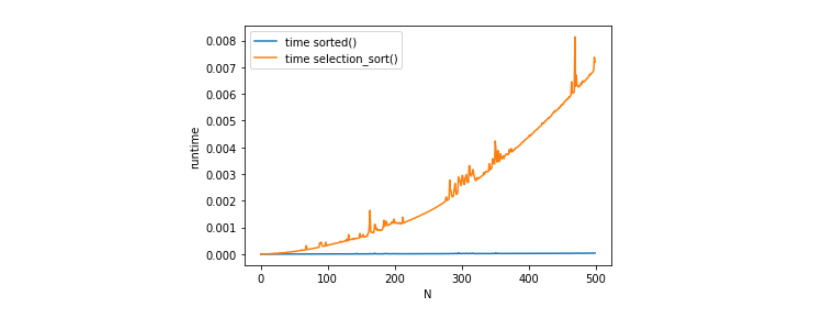

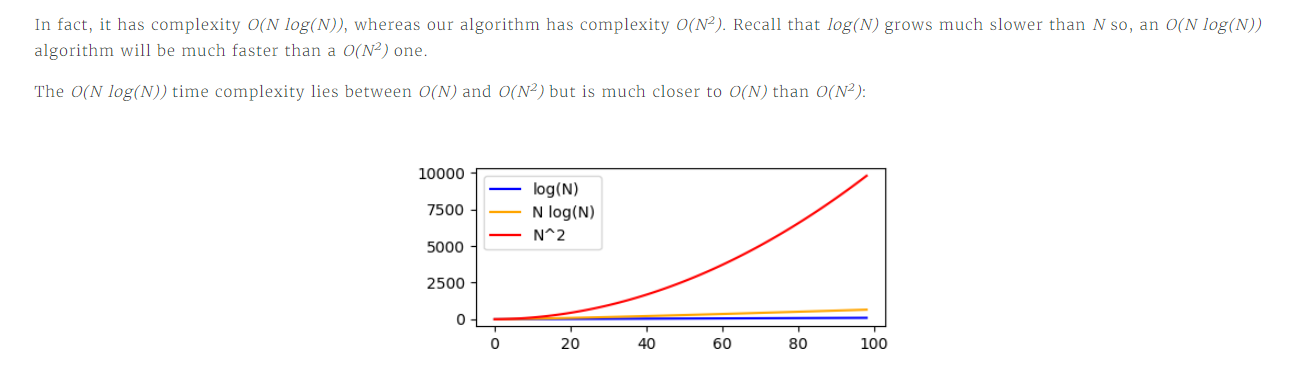

In this file, we've learned:

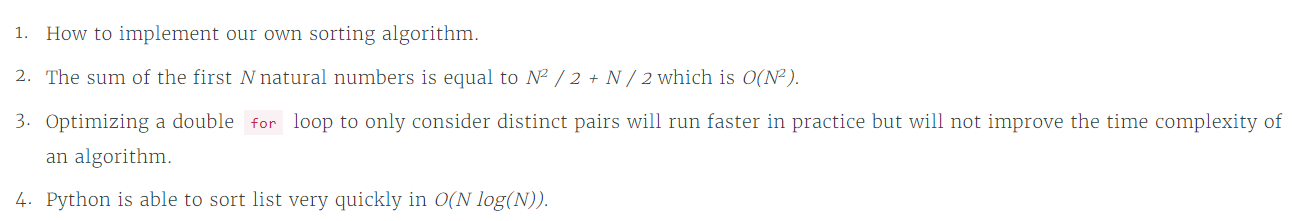

In the next file we will learn that time is not the only parameter to take into account when evaluating the quality of an algorithm.

The amount of memory that an algorithm requires is also very important. Memory consumption is becoming more and more important. We will see that there is often a trade-off between speed and memory and that, by sacrificing one, we can usually improve the other.